# Visualization of the Poster Layouts

In [6]:
import numpy as np
import cv2 as cv
from  matplotlib import pyplot as plt

## Load the poster layouts

In [3]:
layouts = np.load('..\data\poster_panel_position.npy')
layouts.shape

(1232, 10, 5)

## Define Category colors

In [9]:
category_color = {
    0:(0,0,255),   
    1:(255,120,0),
    2:(0,120,255),
    3:(255,0,255),
    4:(0,255,0),
}

## Print by Matplot

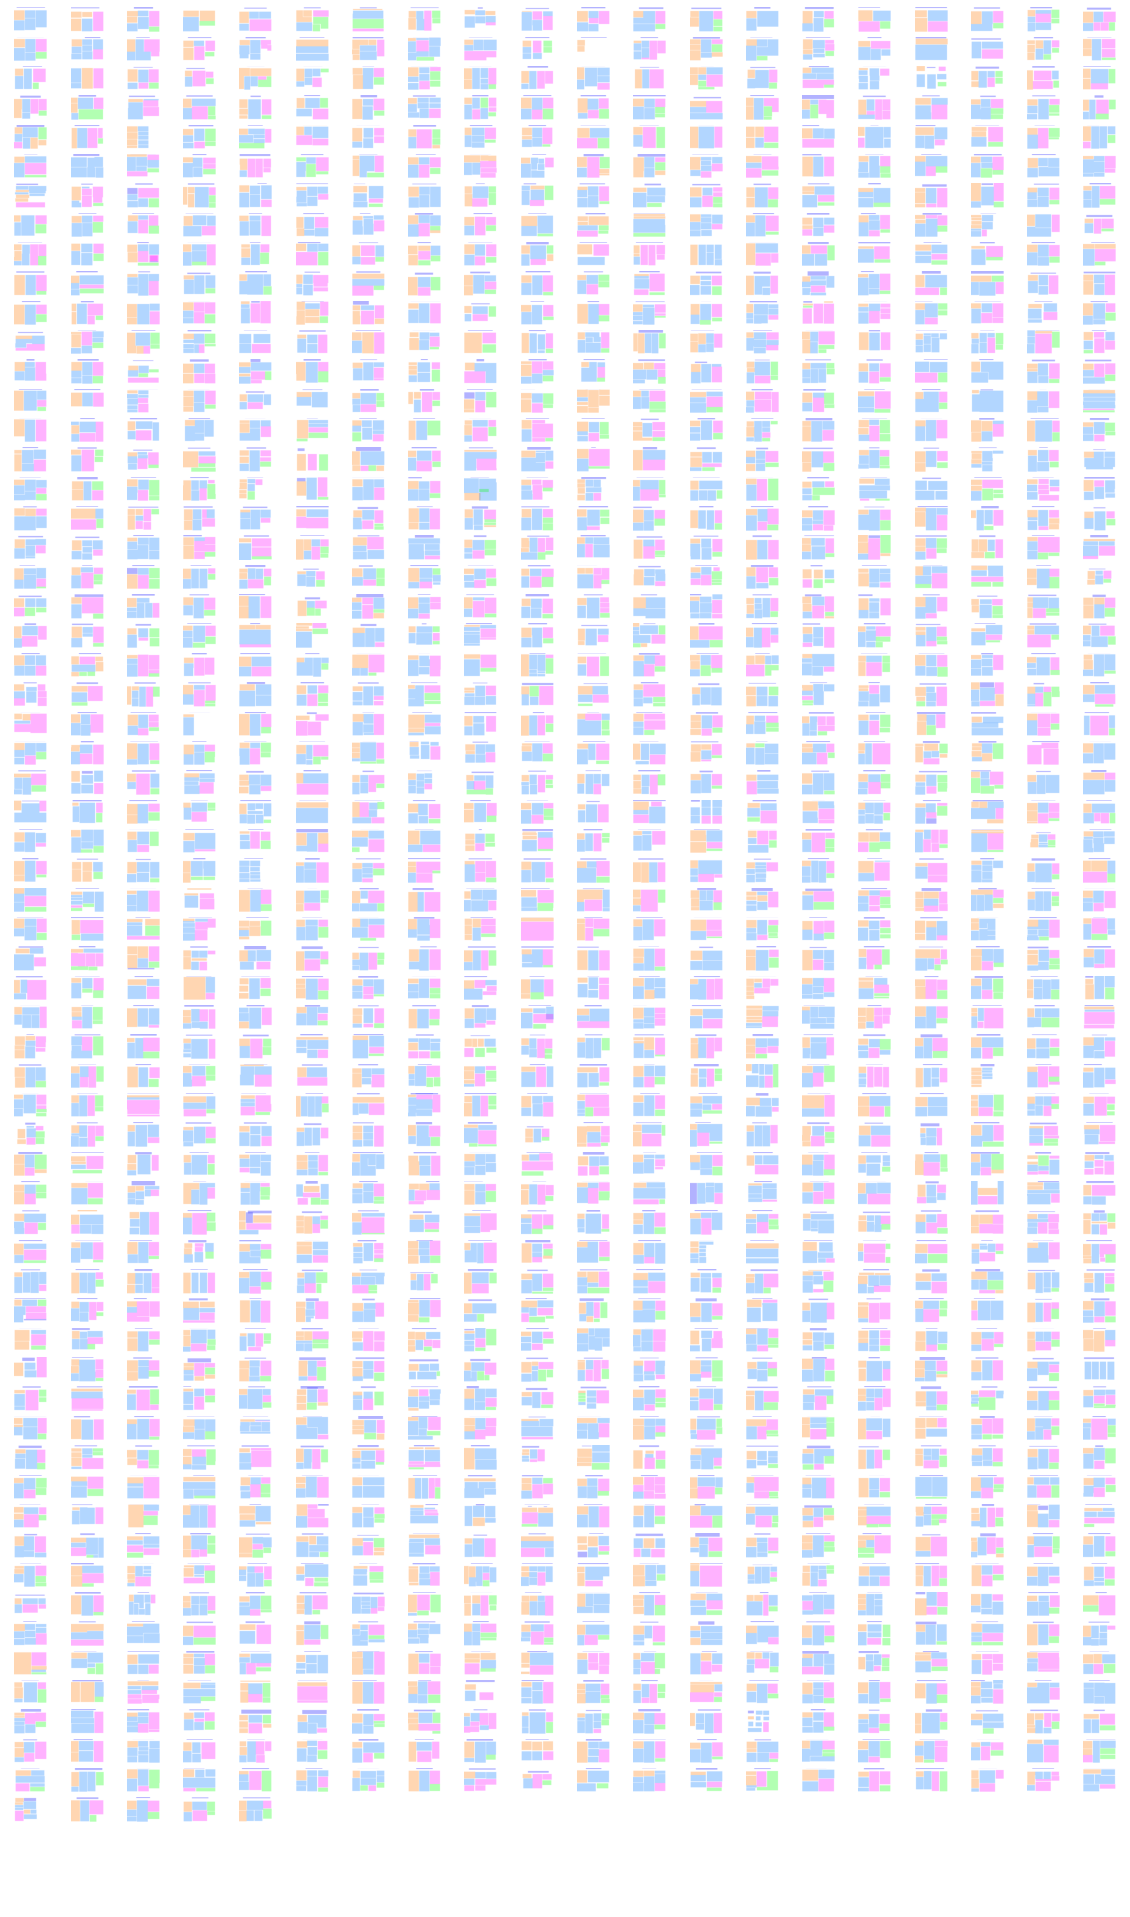

In [98]:
width = 20
height = 65

fig, axs = plt.subplots(height,width,figsize=(20,35))

for ax in axs:
    for a in ax:
        a.axis('off')

x,y = 0, 0

for index,poster in enumerate(layouts):

    new_poster = np.full((75,100,3),255)
    poster_h,poster_w,_ = new_poster.shape # (H,W,C)

    panel_count = 0
    for panel in poster:
        if panel[0] == 5:
            continue
        panel_count += 1

        panel_xc,panel_yc,panel_w,panel_h = panel[1],panel[2],panel[3],panel[4]
        panel_x1,panel_y1 = panel_xc - panel_w / 2, panel_yc - panel_h / 2
        panel_x1,panel_w = int(panel_x1 * poster_w),int(panel_w * poster_w)
        panel_y1,panel_h = int(panel_y1 * poster_h),int(panel_h * poster_h)

        panel_x2 = panel_x1 + panel_w
        panel_y2 = panel_y1 + panel_h


        panel_pos_reg = np.zeros((panel_h,panel_w,3),dtype=np.uint8)
        panel_pos_reg[:,:,0],panel_pos_reg[:,:,1],panel_pos_reg[:,:,2] = category_color[panel[0]]
        
        img_add = cv.addWeighted(new_poster[panel_y1 : panel_y2, panel_x1 : panel_x2], 0.7 ,panel_pos_reg, 0.3, 0, dtype=cv.CV_32F)
        new_poster[panel_y1 : panel_y2, panel_x1 : panel_x2] = img_add

    if panel_count < 3: # Fliter out the poster with few panels
        continue

    axs[y,x].imshow(new_poster)

    if x == width - 1:
        x = 0
        y += 1
    else:
        x += 1

